In [89]:
import cv2
import skimage as sk
from skimage import data, io, filters, exposure
import numpy as np
import skimage.morphology as mp


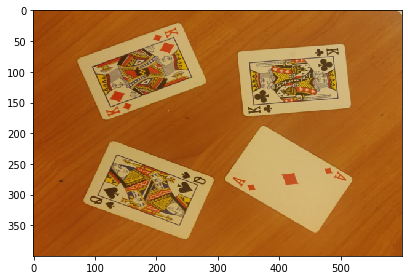

In [99]:

image = sk.img_as_ubyte(io.imread("cardsOnFloor.jpg"))
image = sk.transform.resize(image,(400,600))
io.imshow(image)

array([[ 84,  84,  84, ..., 198, 198, 198],
       [ 84,  84,  85, ..., 198, 198, 198],
       [ 84,  85,  85, ..., 198, 198, 198],
       ...,
       [ 88,  87,  87, ...,  89,  89,  88],
       [ 88,  87,  87, ...,  89,  88,  87],
       [ 88,  87,  86, ...,  89,  87,  87]], dtype=uint8)

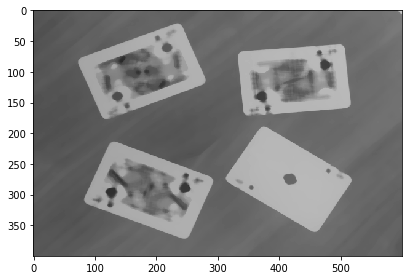

In [100]:
grayimage = sk.img_as_ubyte(sk.color.rgb2gray(image))
grayimage = cv2.medianBlur(grayimage,11) #rozmycie pomaga w usunięciu krawędzi zbędnych krawędzi
io.imshow(grayimage)
grayimage


(400, 600)

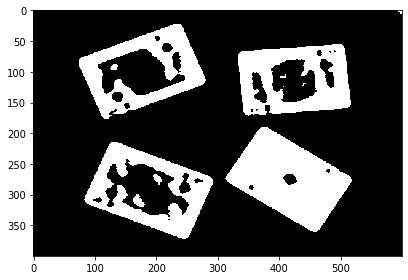

In [101]:
threshold, thresholdedImage = cv2.threshold(grayimage, 127, 255, cv2.THRESH_OTSU) #THRESH_OTSU sam dobiera próg na podstawie rozkładu kolorów(zakłada,że jest bimodalny), drugi argument nie ma znaczenia XD
io.imshow(thresholdedImage)
thresholdedImage.shape

In [102]:
def compareWithRectangle(contour): #ważne, dla danego konturu dobieramy najlepiej pasujący do niego prostokąt, następnie porównujemy powierzchnie konturu z powierzchnią prostokątu
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    return (cv2.contourArea(contour)/cv2.contourArea(box))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[256 377]
 [ 80 312]
 [119 208]
 [294 272]]


[array([[256, 377],
       [ 80, 312],
       [119, 208],
       [294, 272]], dtype=int64)]
[[465 367]
 [310 276]
 [365 181]
 [520 272]]


[array([[465, 367],
       [310, 276],
       [365, 181],
       [520, 272]], dtype=int64)]
[[340 172]
 [331  67]
 [508  53]
 [517 159]]


[array([[340, 172],
       [331,  67],
       [508,  53],
       [517, 159]], dtype=int64)]
[[108 182]
 [ 70  79]
 [245  16]
 [282 118]]


[array([[108, 182],
       [ 70,  79],
       [245,  16],
       [282, 118]], dtype=int64)]


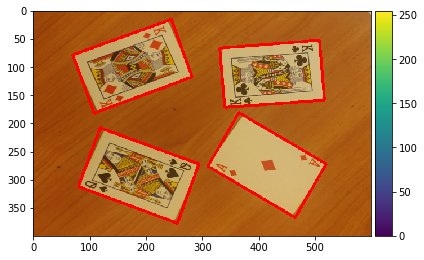

In [103]:
contours,b = cv2.findContours(thresholdedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #znajdujemy kontury
cntfiltered = [x for x in contours if cv2.contourArea(x) > 1000 and compareWithRectangle(x) > 0.9] #filtrujemy do takich, które są dostatecznie duze i które mają prostokątny kształt
colors = ((255,0,0),(0,255,0),(0,0,255),(124,0,200),(124,0,200),(124,0,200)) #jakieś przykładowe kolory do wizualizacji
boxes = []
for i,x in enumerate(cntfiltered): #wizualizacja efektu
    rect = cv2.minAreaRect(x)
    box = cv2.boxPoints(rect)
    box = np.int0(box)


    cv2.drawContours(image,[box],-1,colors[0],3)
    
io.imshow(image)
